# Step 1: Installation and Setup

In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os, sys
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.model_selection import train_test_split
import ssl
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense
from tensorflow.keras.models import Model

# Step 2: Data Preprocessing

In [2]:
# Importing the dataset 
from PIL import Image
import os, sys
path = "."

dirs_train_o = os.listdir(path + "/TRAIN/O")
dirs_train_r = os.listdir(path + "/TRAIN/R")
dirs_test_o = os.listdir(path + "/TEST/O")
dirs_test_r = os.listdir(path + "/TEST/R")

# Resize image using Pillow
class_name = ['O', 'R']
# Create training set
x_train = []
x_train.append(dirs_train_o)
x_train.append(dirs_train_r)

# Create testing test
x_test = []
x_test.append(dirs_test_o)
x_test.append(dirs_test_r)

def modify_image(dataset, pathname):
  names = []
  labels = []
  for type in range(2):
    for item in dataset[type]:
      path_tmp = path + "/" + pathname + "/" + class_name[type] + "/"
      if os.path.isfile(path_tmp+item):
        im = Image.open(path_tmp+item)
        imResize = im.resize((32, 32), Image.ANTIALIAS)
        if imResize.mode != 'RGB':
          imResize = imResize.convert('RGB')
        names.append(imResize)
        labels.append(type)
  return names, labels

names_train, labels_train = modify_image(x_train, "TRAIN")
names_test, labels_test = modify_image(x_test, "TEST")
print("Done")

Done


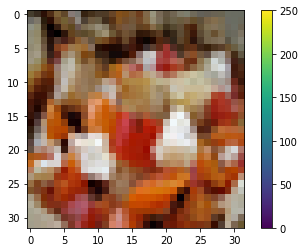

In [3]:
# Train
x_train = np.array([np.array(fname) for fname in names_train])
y_train = np.array(labels_train)

# Test
x_test = np.array([np.array(fname) for fname in names_test])
y_test = np.array(labels_test)

# Data Exploration
x_train.shape, y_train.shape
plt.figure()
plt.imshow(x_train[12])
plt.colorbar()

# Normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

## RESNET50

In [5]:
ssl._create_default_https_context = ssl._create_unverified_context
resnet_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet',include_top=False, input_shape=(32,32,3))
x = resnet_model.output
x = GlobalMaxPooling2D()(x)
x=Dense(256,activation='relu')(x) 
x=Dense(128,activation='relu')(x) 
x=Dense(1, activation= 'sigmoid')(x)
model = Model(inputs = resnet_model.input, outputs = x)
model.compile(loss='binary_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
history = model.fit(x_train, y_train, batch_size=10, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
1806/1806 [==============================] - 443s 246ms/step - loss: 0.5798 - accuracy: 0.7145 - val_loss: 0.6333 - val_accuracy: 0.6612
Epoch 2/20
1806/1806 [==============================] - 443s 245ms/step - loss: 0.5200 - accuracy: 0.7624 - val_loss: 0.6482 - val_accuracy: 0.7210
Epoch 3/20
1806/1806 [==============================] - 644s 356ms/step - loss: 0.5475 - accuracy: 0.7401 - val_loss: 0.5773 - val_accuracy: 0.6920
Epoch 4/20
1806/1806 [==============================] - 434s 240ms/step - loss: 0.5126 - accuracy: 0.7466 - val_loss: 0.5414 - val_accuracy: 0.7676
Epoch 5/20
1806/1806 [==============================] - 437s 242ms/step - loss: 0.5452 - accuracy: 0.7267 - val_loss: 0.5345 - val_accuracy: 0.7357
Epoch 6/20
1806/1806 [==============================] - 439s 243ms/step - loss: 0.5052 - accuracy: 0.7627 - val_loss: 0.7179 - val_accuracy: 0.6539
Epoch 7/20
1806/1806 [==============================] - 438s 243ms/step - loss: 0.4899 - accuracy: 0.7715 - val_

79/79 [==============================] - 4s 48ms/step - loss: 0.3750 - accuracy: 0.8404
Loss = 0.3750174343585968
Test Accuracy = 0.8404297828674316


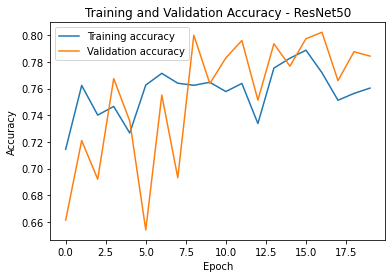

In [8]:
eval = model.evaluate(x_test, y_test)
print ("Loss = " + str(eval[0]))
print ("Test Accuracy = " + str(eval[1]))

y_pred = model.predict(x_test)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, label="Training accuracy")
plt.plot(epochs, val_acc, label="Validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("Training and Validation Accuracy - ResNet50")
plt.legend()
plt.savefig("acc-ResNet50")

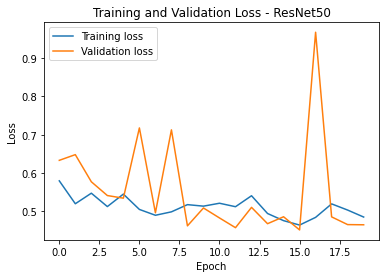

In [10]:
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Training and Validation Loss - ResNet50")
plt.legend()
# plt.figure()
plt.savefig("loss-ResNet50")

In [20]:
acc_score = accuracy_score(y_test, y_pred.round())
f1_score = f1_score(y_test, y_pred.round())
recall_score = recall_score(y_test, y_pred.round())
precision_score = precision_score(y_test, y_pred.round())

In [21]:
print(precision_score, recall_score, f1_score, acc_score)

0.9035187287173666 0.7158273381294964 0.7987957852483694 0.8404297652208516
